Data is at : https://drive.google.com/drive/folders/1PH9H15SrwSpVLhikVmSrDeIedE6XsmJ6?usp=sharing

Presentation video link: https://www.youtube.com/watch?v=f0gRMg2cdHE

# Project 2 - Final Report 

# Creation of a Model
### Predicing if a kickstarter project would be successful or not 

## Group 13 - Padmil Khandelwal and Ali Iftikhar

### Introduction: 

In this project, we made use of different Machine Learning models to predict whether a kickstarter project would be successful or not. We used Linear Discriminant Analysis, Random Forests, K-nearest neighbors and Gaussian Model to make our prediction. Our goal is to prepare a model which creates value for two groups:
1. The Investors (someone who wants to invest in a kickstarter project) - our model gives a prediction about the probability of a new business being successful.
2. The Entrepreneur(s) (the person(s) who started the kickstarter project) - our model will make a prediction about the probability with which the business would be successful and if it is unsuccessful then the entrepreneur(s) can compare its stats with those in the Exploratory Data Analysis (EDA) to see which features to work on.   

### Data:

For our data, we used data of kickstarts for the year 2020. The data contained a bunch of features but for the purpose of our analysis, we reduced the number of features to around 25. The first few rows of the data looks like this:

In [38]:
import pandas as pd
from plotnine import *
from plotly import *
import plotly.graph_objects as go
import matplotlib.pyplot as plt

f1 = pd.read_csv('Kickstarter - 1.csv')
f1 = f1[['backers_count', 'blurb', 'converted_pledged_amount', 'category', 'pledged',
       'country_displayable_name', 'created_at', 'deadline', 'currency', 'current_currency',
       'goal', 'id', 'name', 'state', 'usd_type', 'fx_rate', 'static_usd_rate', 'usd_pledged']]

f2 = pd.read_csv('Kickstarter - 2.csv')
f2 = f2[['backers_count', 'blurb', 'converted_pledged_amount', 'category', 'pledged',
       'country_displayable_name', 'created_at', 'deadline', 'currency', 'current_currency',
       'goal', 'id', 'name', 'state', 'usd_type', 'fx_rate', 'static_usd_rate', 'usd_pledged']]

f3 = pd.read_csv('Kickstarter - 3.csv')
f3 = f3[['backers_count', 'blurb', 'converted_pledged_amount', 'category', 'pledged',
       'country_displayable_name', 'created_at', 'deadline', 'currency', 'current_currency',
       'goal', 'id', 'name', 'state', 'usd_type', 'fx_rate', 'static_usd_rate', 'usd_pledged']]

f4 = pd.read_csv('Kickstarter - 4.csv')
f4 = f4[['backers_count', 'blurb', 'converted_pledged_amount', 'category', 'pledged',
       'country_displayable_name', 'created_at', 'deadline', 'currency', 'current_currency',
       'goal', 'id', 'name', 'state', 'usd_type', 'fx_rate', 'static_usd_rate', 'usd_pledged']]

f5 = pd.read_csv('Kickstarter - 5.csv')
f5 = f5[['backers_count', 'blurb', 'converted_pledged_amount', 'category', 'pledged',
       'country_displayable_name', 'created_at', 'deadline', 'currency', 'current_currency',
       'goal', 'id', 'name', 'state', 'usd_type', 'fx_rate', 'static_usd_rate', 'usd_pledged']]

f6 = pd.read_csv('Kickstarter - 6.csv')
f6 = f6[['backers_count', 'blurb', 'converted_pledged_amount', 'category', 'pledged',
       'country_displayable_name', 'created_at', 'deadline', 'currency', 'current_currency',
       'goal', 'id', 'name', 'state', 'usd_type', 'fx_rate', 'static_usd_rate', 'usd_pledged']]

f7 = pd.read_csv('Kickstarter - 7.csv')
f7 = f7[['backers_count', 'blurb', 'converted_pledged_amount', 'category', 'pledged',
       'country_displayable_name', 'created_at', 'deadline', 'currency', 'current_currency',
       'goal', 'id', 'name', 'state', 'usd_type', 'fx_rate', 'static_usd_rate', 'usd_pledged']]

f8 = pd.read_csv('Kickstarter - 8.csv')
f8 = f8[['backers_count', 'blurb', 'converted_pledged_amount', 'category', 'pledged',
       'country_displayable_name', 'created_at', 'deadline', 'currency', 'current_currency',
       'goal', 'id', 'name', 'state', 'usd_type', 'fx_rate', 'static_usd_rate', 'usd_pledged']]

f9 = pd.read_csv('Kickstarter - 9.csv')
f9 = f9[['backers_count', 'blurb', 'converted_pledged_amount', 'category', 'pledged',
       'country_displayable_name', 'created_at', 'deadline', 'currency', 'current_currency',
       'goal', 'id', 'name', 'state', 'usd_type', 'fx_rate', 'static_usd_rate', 'usd_pledged']]

f10 = pd.read_csv('Kickstarter - 10.csv')
f10 = f10[['backers_count', 'blurb', 'converted_pledged_amount', 'category', 'pledged',
       'country_displayable_name', 'created_at', 'deadline', 'currency', 'current_currency',
       'goal', 'id', 'name', 'state', 'usd_type', 'fx_rate', 'static_usd_rate', 'usd_pledged']]

f11 = pd.read_csv('Kickstarter - 11.csv')
f11 = f11[['backers_count', 'blurb', 'converted_pledged_amount', 'category', 'pledged',
       'country_displayable_name', 'created_at', 'deadline', 'currency', 'current_currency',
       'goal', 'id', 'name', 'state', 'usd_type', 'fx_rate', 'static_usd_rate', 'usd_pledged']]


f = pd.concat([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11])

f['Main_Category'] = f['category'].apply(lambda x: x[x.find(':', x.find('parent_name'))+2:x.find('color') - 3])
f['Category'] = f['category'].apply(lambda x: x[x.find(':', x.find('name'))+2:x.find('slug') - 3])

f['created_at_yr'] = f['created_at'].apply(lambda x: int(x//(3600*24*365)) + 1970) 
f['created_at_mo'] = f['created_at'].apply(lambda y: int(((y/(3600*24*365)) - y//(3600*24*365))*12)+1) 
f['created_at_dy'] = f['created_at'].apply(lambda y: int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24)+1) 
f['created_at_hr'] = f['created_at'].apply(lambda y: int((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24)+1) 
f['created_at_mi'] = f['created_at'].apply(lambda y: int((((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24) - int((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24))*60)+1) 
f['created_at_sc'] = f['created_at'].apply(lambda y: int((((((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24) - int((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24))*60) - int((((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24) - int((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24))*60))*60)+1) 

f['deadline_yr'] = f['deadline'].apply(lambda x: int(x//(3600*24*365)) + 1970) 
f['deadline_mo'] = f['deadline'].apply(lambda y: int(((y/(3600*24*365)) - y//(3600*24*365))*12)+1) 
f['deadline_dy'] = f['deadline'].apply(lambda y: int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24)+1) 
f['deadline_hr'] = f['deadline'].apply(lambda y: int((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24)+1) 
f['deadline_mi'] = f['deadline'].apply(lambda y: int((((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24) - int((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24))*60)+1) 
f['deadline_sc'] = f['deadline'].apply(lambda y: int((((((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24) - int((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24))*60) - int((((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24) - int((((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24) - int((((y/(3600*24*365)) - y//(3600*24*365))*12 - int(((y/(3600*24*365)) - y//(3600*24*365))*12))*24))*24))*60))*60)+1) 

successful = ['successful',]
failed = ['canceled', 'failed', 'suspended']

f['state_new'] = f['state'].apply(lambda x: 'successful' if x in successful else 'unsuccessful')

f['usd_pledged_real'] = f['pledged']/f['fx_rate']
f['usd_goal_real'] = f['goal']/f['fx_rate']


f_final = f[['id', 'blurb', 'Category', 'Main_Category', 'currency', 
             'deadline_yr', 'deadline_mo', 'deadline_dy', 'deadline_hr', 
             'deadline_mi', 'deadline_sc', 'goal', 'created_at_yr', 'created_at_mo',
             'created_at_dy', 'created_at_hr', 'created_at_mi', 'created_at_sc',
             'pledged', 'state', 'backers_count', 'country_displayable_name', 
             'usd_pledged', 'usd_pledged_real', 'usd_goal_real']]

f_final.rename({'id':'ID', 'blurb':'name', 'Category':'category', 'Main_Category':'main_category', 
                'backers_count':'backers', 'country_displayable_name':'country'}, axis = 1, inplace = True)

f_final['filter'] = f_final['main_category'].apply(lambda x : 1 if (':' in x) else 0)
f_final_1 = f_final[f_final['filter'] == 0] 
f_final_1.drop(columns = ['filter'], inplace = True)

f_final_1.to_csv('project_2.csv', index = False)

f_final_2 = f_final_1.copy()

f_final_3 = f_final_2[f_final_2['state'] != 'live']

successful = ['successful',]
failed = ['canceled', 'failed', 'suspended']

f_final_3['state_new'] = f_final_3['state'].apply(lambda x: 'successful' if x in successful else 'unsuccessful')
f_final_3['state_new'] = f_final_3['state'].apply(lambda x: 1 if x in successful else 0)

f_main_cat = f_final_3.groupby(['main_category', 'state_new']).count()
f_main_cat.reset_index(inplace = True)

def cat(x):
    if x < 39:
        return 1
    elif x >= 39 and x < 78:
        return 2
    elif x >= 78 and x < 117:
        return 3
    elif x >= 117 and x < 156:
        return 4
    elif x >= 156 and x < 195:
        return 5
    elif x >= 195 and x < 234:
        return 6
    elif x >= 234:
        return 7
        
f_cat = f_final_3.groupby(['category', 'state_new']).count()
f_cat.reset_index(inplace = True)
f_cat.reset_index(inplace = True)
f_cat['num'] = f_cat['index'].apply(cat)
f_cat_1 = f_cat[f_cat['num'] == 1]
f_cat_2 = f_cat[f_cat['num'] == 2]
f_cat_3 = f_cat[f_cat['num'] == 3]
f_cat_4 = f_cat[f_cat['num'] == 4]
f_cat_5 = f_cat[f_cat['num'] == 5]
f_cat_6 = f_cat[f_cat['num'] == 6]
f_cat_7 = f_cat[f_cat['num'] == 7]

f_cyr = f_final_3.groupby(['created_at_yr', 'state_new']).count()
f_cyr.reset_index(inplace = True)
f_cyr_s = f_cyr[f_cyr['state_new'] == 1]
f_cyr_us = f_cyr[f_cyr['state_new'] == 0]

f_cmo = f_final_3.groupby(['created_at_mo', 'state_new']).count()
f_cmo.reset_index(inplace = True)
f_cmo_s = f_cmo[f_cmo['state_new'] == 1]
f_cmo_us = f_cmo[f_cmo['state_new'] == 0]

f_cdy = f_final_3.groupby(['created_at_dy', 'state_new']).count()
f_cdy.reset_index(inplace = True)
f_cdy_s = f_cdy[f_cdy['state_new'] == 1]
f_cdy_us = f_cdy[f_cdy['state_new'] == 0]

f_chr = f_final_3.groupby(['created_at_hr', 'state_new']).count()
f_chr.reset_index(inplace = True)
f_chr_s = f_chr[f_chr['state_new'] == 1]
f_chr_us = f_chr[f_chr['state_new'] == 0]

f_cmi = f_final_3.groupby(['created_at_mi', 'state_new']).count()
f_cmi.reset_index(inplace = True)
f_cmi_s = f_cmi[f_cmi['state_new'] == 1]
f_cmi_us = f_cmi[f_cmi['state_new'] == 0]

f_csc = f_final_3.groupby(['created_at_sc', 'state_new']).count()
f_csc.reset_index(inplace = True)
f_csc_s = f_csc[f_csc['state_new'] == 1]
f_csc_us = f_csc[f_csc['state_new'] == 0]

f_dyr = f_final_3.groupby(['deadline_yr', 'state_new']).count()
f_dyr.reset_index(inplace = True)
f_dyr_s = f_dyr[f_dyr['state_new'] == 1]
f_dyr_us = f_dyr[f_dyr['state_new'] == 0]

f_dmo = f_final_3.groupby(['deadline_mo', 'state_new']).count()
f_dmo.reset_index(inplace = True)
f_dmo_s = f_dmo[f_dmo['state_new'] == 1]
f_dmo_us = f_dmo[f_dmo['state_new'] == 0]

f_ddy = f_final_3.groupby(['deadline_dy', 'state_new']).count()
f_ddy.reset_index(inplace = True)
f_ddy_s = f_ddy[f_ddy['state_new'] == 1]
f_ddy_us = f_ddy[f_ddy['state_new'] == 0]

f_dhr = f_final_3.groupby(['deadline_hr', 'state_new']).count()
f_dhr.reset_index(inplace = True)
f_dhr_s = f_dhr[f_dhr['state_new'] == 1]
f_dhr_us = f_dhr[f_dhr['state_new'] == 0]

f_dmi = f_final_3.groupby(['deadline_mi', 'state_new']).count()
f_dmi.reset_index(inplace = True)
f_dmi_s = f_dmi[f_dmi['state_new'] == 1]
f_dmi_us = f_dmi[f_dmi['state_new'] == 0]

f_dsc = f_final_3.groupby(['deadline_sc', 'state_new']).count()
f_dsc.reset_index(inplace = True)
f_dsc_s = f_dsc[f_dsc['state_new'] == 1]
f_dsc_us = f_dsc[f_dsc['state_new'] == 0]

ks = pd.read_csv('project_2.csv')
ks.head(6)

C:\Users\ali_1\anaconda3\lib\site-packages\pandas\core\frame.py:4295: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-6ece6c77b8b9>:101: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ali_1\anaconda3\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-6ece6c77b8b9>:114: SettingWithCopyWarning:


A va

,ID,name,category,main_category,currency,deadline_yr,deadline_mo,deadline_dy,deadline_hr,deadline_mi,...,created_at_hr,created_at_mi,created_at_sc,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1432554512,Das Good Inc goal is to make cooking easy and ...,Restaurants,Food,USD,2019,2,13,7,40,...,16,1,36,266.0,failed,6,the United States,266.0,266.0,75000.0
1,1925377347,A web series about the soul crushing exercise ...,Webseries,Film & Video,USD,2017,2,5,21,36,...,9,49,40,260.0,failed,2,the United States,260.0,260.0,6000.0
2,1088749014,"A photographic essay on the historic, incompar...",Photobooks,Photography,USD,2016,11,22,15,41,...,1,35,25,185.0,failed,3,the United States,185.0,185.0,1200.0
3,1876427386,A romantic comedy mini series following a self...,Webseries,Film & Video,USD,2018,5,16,21,46,...,22,56,31,35.0,failed,2,the United States,35.0,35.0,10000.0
4,671662806,The Drums of Atlant is an original science fic...,Science Fiction,Film & Video,USD,2019,5,21,20,47,...,4,5,35,261.0,failed,8,the United States,261.0,261.0,20000.0
5,918421316,"""...a real photographer will make you look twi...",Photobooks,Photography,USD,2015,8,2,13,22,...,14,4,49,26.0,failed,2,the United States,26.0,26.0,985.0


We had to perform some data engineering tasks to get to this dataset which was essential for the analysis and for interpretability. Here's the list of our features:

In [2]:
print('Cols ', list(ks.columns))

Cols  ['ID', 'name', 'category', 'main_category', 'currency', 'deadline_yr', 'deadline_mo', 'deadline_dy', 'deadline_hr', 'deadline_mi', 'deadline_sc', 'goal', 'created_at_yr', 'created_at_mo', 'created_at_dy', 'created_at_hr', 'created_at_mi', 'created_at_sc', 'pledged', 'state', 'backers', 'country', 'usd_pledged', 'usd_pledged_real', 'usd_goal_real']


The `state` column shows the outcome of the project.

In [3]:
print('Unique values in `state` column:', list(ks.state.unique()))

Unique values in `state` column: ['failed', 'successful', 'live', 'canceled', 'suspended']


Using this data, how can we use features such as project category, currency, funding goal, and country to predict if a Kickstarter project will succeed? 

### Exploratory Data Analysis

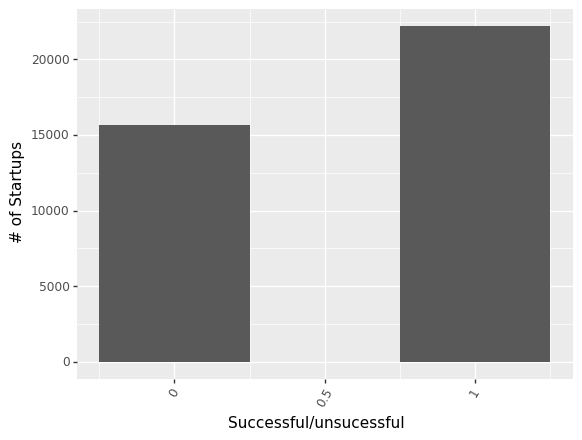

<ggplot: (154383859965)>

In [6]:
(ggplot(f_final_3, aes(x='state_new', fill = 'state_new')) + geom_histogram(binwidth = 0.5)) + theme(axis_text_x=element_text(angle=60)) + labs(x = "Successful/unsucessful", y = '# of Startups')

This plot shows us the number of successful and unsuccessful businesses, 1 represents a successful business and 0 represents an unsuccessful business. On average we can see that there are more successful business than unsuccessful ones

C:\Users\ali_1\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



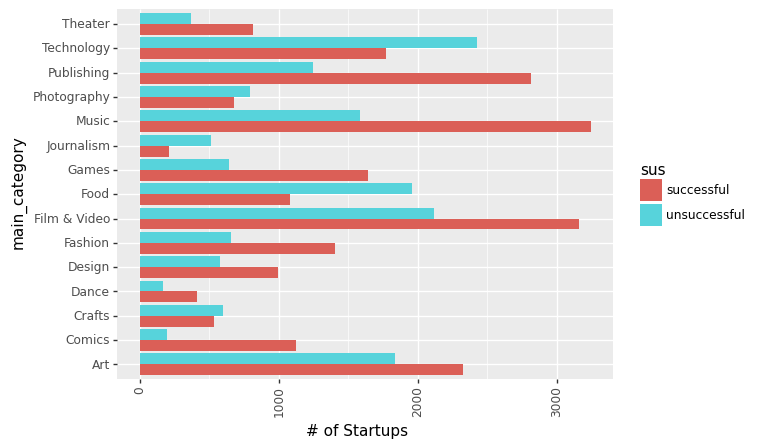

<ggplot: (154397541961)>

In [18]:
f_main_cat['sus'] = f_main_cat['state_new'].apply(lambda x: 'successful' if (x == 1) else 'unsuccessful')
p = ggplot(aes(x='main_category', y = 'state', fill='sus'), f_main_cat)
p + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(angle=90)) + coord_flip() + labs(y = '# of Startups')

This plot shows us how fields not related to STEM were relatively successful and the ones related to Art and Music were more successful

<ipython-input-21-90ee44a04da6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ali_1\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



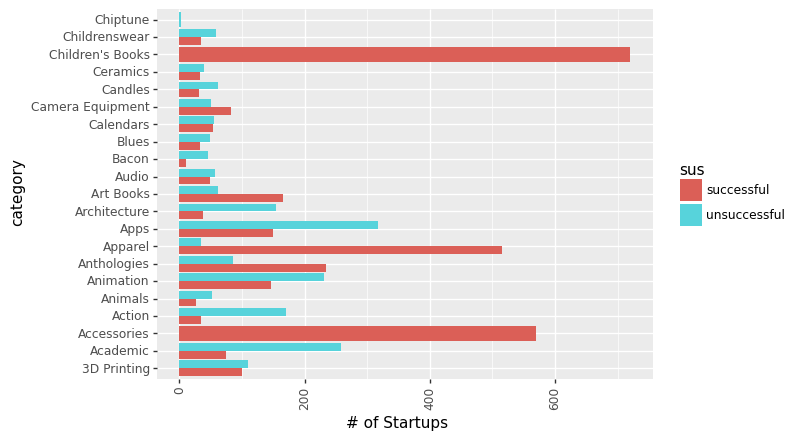

<ggplot: (154398857000)>

In [21]:
f_cat_1['sus'] = f_cat_1['state_new'].apply(lambda x: 'successful' if (x == 1) else 'unsuccessful')
p = ggplot(aes(x='category', y = 'state', fill='sus'), f_cat_1)
p + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(angle=90)) + coord_flip() + labs(y = '# of Startups')

<ipython-input-22-d0985d6e4da9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ali_1\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



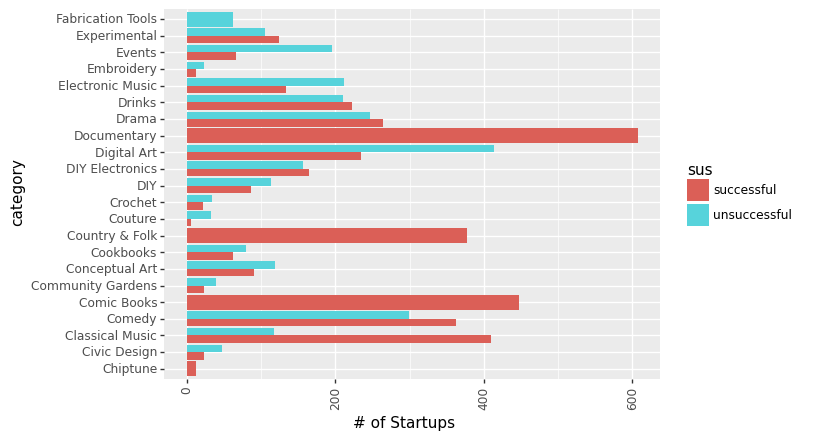

<ggplot: (154399092893)>

In [22]:
f_cat_2['sus'] = f_cat_2['state_new'].apply(lambda x: 'successful' if (x == 1) else 'unsuccessful')
p = ggplot(aes(x='category', y = 'state', fill='sus'), f_cat_2)
p + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(angle=90)) + coord_flip() + labs(y = '# of Startups')

<ipython-input-23-11108302effa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ali_1\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



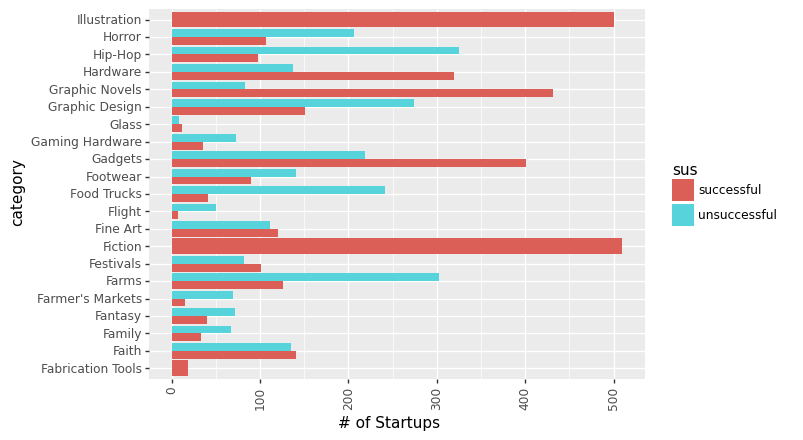

<ggplot: (154399292594)>

In [23]:
f_cat_3['sus'] = f_cat_3['state_new'].apply(lambda x: 'successful' if (x == 1) else 'unsuccessful')
p = ggplot(aes(x='category', y = 'state', fill='sus'), f_cat_3)
p + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(angle=90)) + coord_flip() + labs(y = '# of Startups')

<ipython-input-24-51b651c130e1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ali_1\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



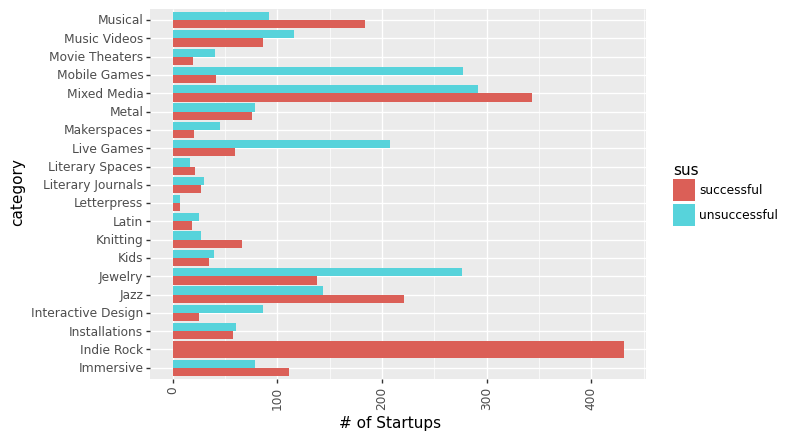

<ggplot: (154398925120)>

In [24]:
f_cat_4['sus'] = f_cat_4['state_new'].apply(lambda x: 'successful' if (x == 1) else 'unsuccessful')
p = ggplot(aes(x='category', y = 'state', fill='sus'), f_cat_4)
p + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(angle=90)) + coord_flip() + labs(y = '# of Startups')

<ipython-input-25-d2f5ed8bc745>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ali_1\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



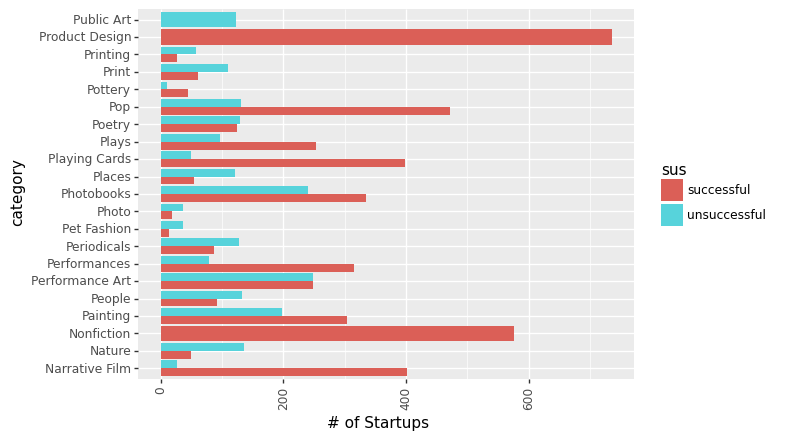

<ggplot: (154397593745)>

In [25]:
f_cat_5['sus'] = f_cat_5['state_new'].apply(lambda x: 'successful' if (x == 1) else 'unsuccessful')
p = ggplot(aes(x='category', y = 'state', fill='sus'), f_cat_5)
p + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(angle=90)) + coord_flip() + labs(y = '# of Startups')

<ipython-input-26-e0c2aeab2e5d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ali_1\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



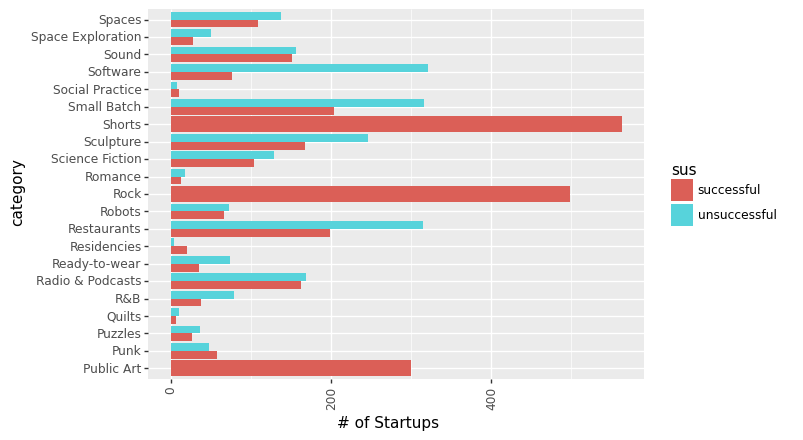

<ggplot: (154397615005)>

In [26]:
f_cat_6['sus'] = f_cat_6['state_new'].apply(lambda x: 'successful' if (x == 1) else 'unsuccessful')
p = ggplot(aes(x='category', y = 'state', fill='sus'), f_cat_6)
p + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(angle=90)) + coord_flip() + labs(y = '# of Startups')

<ipython-input-27-fe86bda7bea0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ali_1\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



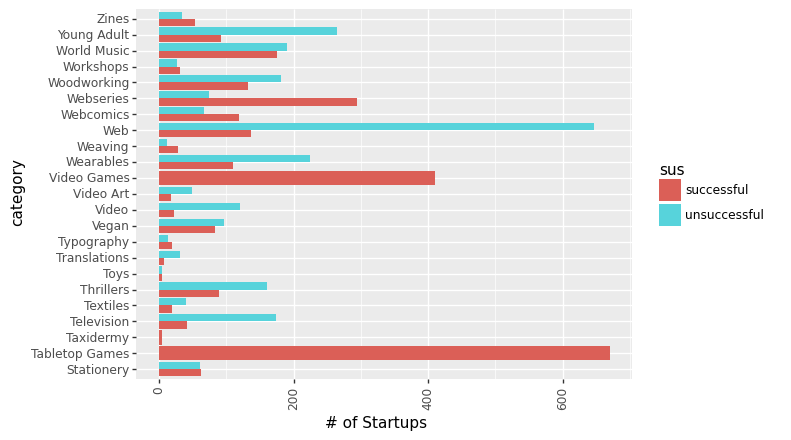

<ggplot: (154397583258)>

In [27]:
f_cat_7['sus'] = f_cat_7['state_new'].apply(lambda x: 'successful' if (x == 1) else 'unsuccessful')
p = ggplot(aes(x='category', y = 'state', fill='sus'), f_cat_7)
p + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(angle=90)) + coord_flip() + labs(y = '# of Startups')

A closer look at the sub-categories show us the types of categories and the sub-types which were more successful. Again the types mostly fall under the main category of music and arts

C:\Users\ali_1\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



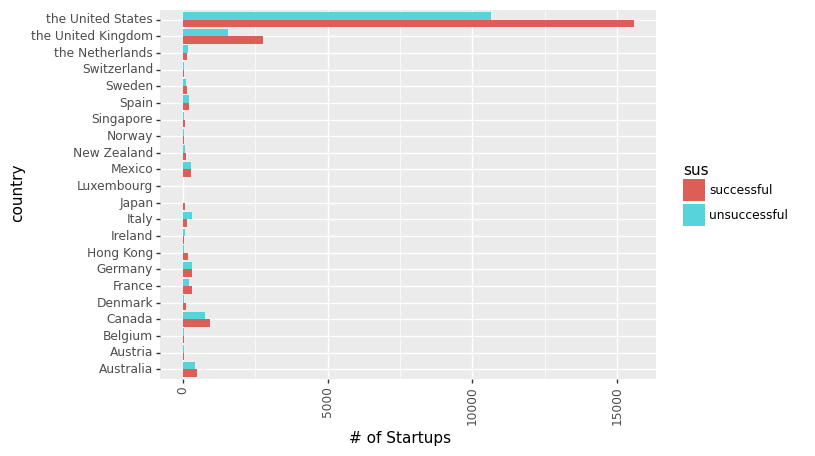

<ggplot: (154398898496)>

In [29]:
f_country = f_final_3.groupby(['country', 'state_new']).count()
f_country.reset_index(inplace = True)
f_country['sus'] = f_country['state_new'].apply(lambda x: 'successful' if (x == 1) else 'unsuccessful')
p = ggplot(aes(x='country', y = 'state', fill='sus'), f_country)
p + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(angle=90)) + coord_flip() + labs(y = '# of Startups')

This plot shows us how the US and the UK have a high number of startups and most of them seem to be successful. The plot however does not show trends of the other countries well enough so we removed those and made another plot:

C:\Users\ali_1\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



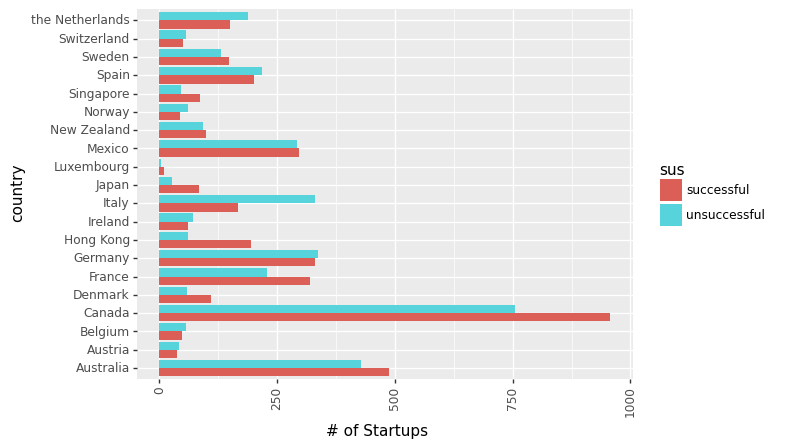

<ggplot: (154397560733)>

In [31]:
f_country_us_uk = f_final_3.groupby(['country', 'state_new']).count()
f_country_us_uk.reset_index(inplace = True)
f_country_us_uk['sus'] = f_country_us_uk['state_new'].apply(lambda x: 'successful' if (x == 1) else 'unsuccessful')
f_country_us_uk = f_country_us_uk[f_country_us_uk['country'] != 'the United States']
f_country_us_uk = f_country_us_uk[f_country_us_uk['country'] != 'the United Kingdom']
p = ggplot(aes(x='country', y = 'state', fill='sus'), f_country_us_uk)
p + geom_col(stat='identity', position='dodge') + theme(axis_text_x=element_text(angle=90)) + coord_flip() + labs(y = '# of Startups')


This plot gives us a better picture of the other countries. Here we can see how Canada and Hong Kong seem to have more successful startups and Italy, Spain, Germany and the Netherlands had more unsuccessful startups than successful startups.

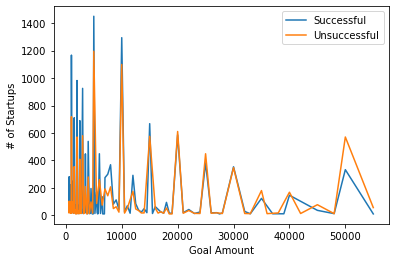

In [33]:
f_goal = f_final_3.groupby(['goal', 'state_new']).count().iloc[250:-450]
f_goal = f_goal[f_goal['name'] > 10]
f_goal.reset_index(inplace = True)
f_goal_s = f_goal[f_goal['state_new'] == 1]
f_goal_us = f_goal[f_goal['state_new'] == 0]

plt.plot(f_goal_s['goal'], f_goal_s['state'], label = 'Successful')
plt.plot(f_goal_us['goal'], f_goal_us['state'], label = 'Unsuccessful')
plt.xlabel('Goal Amount')
plt.ylabel('# of Startups')
plt.legend()


Setting up a higher funding goal does not lead to a startup being successful as well as setting a lower funding goal would

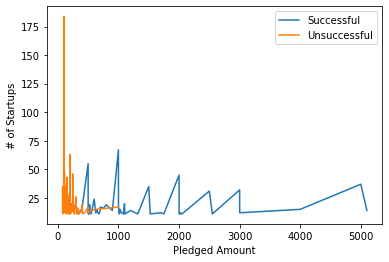

In [35]:
f_pledged = f_final_3.groupby(['pledged', 'state_new']).count().iloc[250:-450]
f_pledged = f_pledged[f_pledged['name'] > 10]
f_pledged.reset_index(inplace = True)
f_pledged_s = f_pledged[f_pledged['state_new'] == 1]
f_pledged_us = f_pledged[f_pledged['state_new'] == 0]

plt.plot(f_pledged_s['pledged'], f_pledged_s['state'], label = 'Successful')
plt.plot(f_pledged_us['pledged'], f_pledged_us['state'], label = 'Unsuccessful')
plt.xlabel('Pledged Amount')
plt.ylabel('# of Startups')
plt.legend()

However when the startup secures a higher amount of funding then there are much higher chances of it being successful

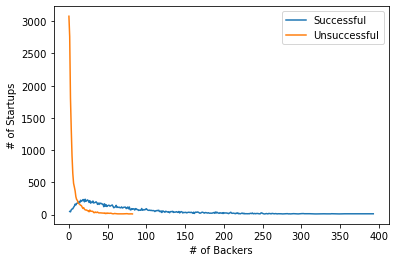

In [36]:
f_backers = f_final_3.groupby(['backers', 'state_new']).count()#.iloc[250:-450]
f_backers = f_backers[f_backers['name'] > 10]
f_backers.reset_index(inplace = True)
f_backers_s = f_backers[f_backers['state_new'] == 1]
f_backers_us = f_backers[f_backers['state_new'] == 0]

plt.plot(f_backers_s['backers'], f_backers_s['state'], label = 'Successful')
plt.plot(f_backers_us['backers'], f_backers_us['state'], label = 'Unsuccessful')
plt.xlabel('# of Backers')
plt.ylabel('# of Startups')
plt.legend()


Having a higher number of backers also leads to higher chances of a startup being successful.

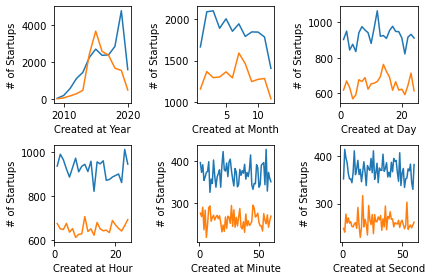

In [39]:
fig,axes=plt.subplots(2,3)
axes[0,0].plot(f_cyr_s['created_at_yr'], f_cyr_s['state'], label = 'Successful')
axes[0,0].plot(f_cyr_us['created_at_yr'], f_cyr_us['state'], label = 'Unsuccessful')
axes[0,0].set_xlabel('Created at Year')
axes[0,0].set_ylabel('# of Startups')
axes[0,1].plot(f_cmo_s['created_at_mo'], f_cmo_s['state'], label = 'Successful')
axes[0,1].plot(f_cmo_us['created_at_mo'], f_cmo_us['state'], label = 'Unsuccessful')
axes[0,1].set_xlabel('Created at Month')
axes[0,1].set_ylabel('# of Startups')
axes[0,2].plot(f_cdy_s['created_at_dy'], f_cdy_s['state'], label = 'Successful')
axes[0,2].plot(f_cdy_us['created_at_dy'], f_cdy_us['state'], label = 'Unsuccessful')
axes[0,2].set_xlabel('Created at Day')
axes[0,2].set_ylabel('# of Startups')
axes[1,0].plot(f_chr_s['created_at_hr'], f_chr_s['state'], label = 'Successful')
axes[1,0].plot(f_chr_us['created_at_hr'], f_chr_us['state'], label = 'Unsuccessful')
axes[1,0].set_xlabel('Created at Hour')
axes[1,0].set_ylabel('# of Startups')
axes[1,1].plot(f_cmi_s['created_at_mi'], f_cmi_s['state'], label = 'Successful')
axes[1,1].plot(f_cmi_us['created_at_mi'], f_cmi_us['state'], label = 'Unsuccessful')
axes[1,1].set_xlabel('Created at Minute')
axes[1,1].set_ylabel('# of Startups')
axes[1,2].plot(f_csc_s['created_at_sc'], f_csc_s['state'], label = 'Successful')
axes[1,2].plot(f_csc_us['created_at_sc'], f_csc_us['state'], label = 'Unsuccessful')
axes[1,2].set_xlabel('Created at Second')
axes[1,2].set_ylabel('# of Startups')
plt.tight_layout()

The data also enabled us to compare successful startups with unsuccessful ones based on the year, month, day, hour, minute and second they were started (all of these variables were analyzed separately) 

Text(260.2044117647059, 0.5, '# of Startups')

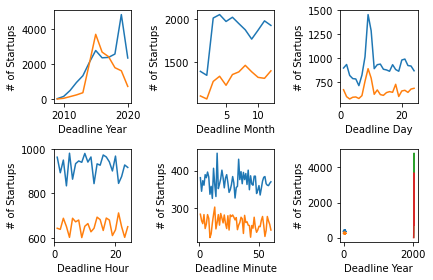

In [41]:
fig,axes=plt.subplots(2,3)
axes[0,0].plot(f_dyr_s['deadline_yr'], f_dyr_s['state'], label = 'Successful')
axes[0,0].plot(f_dyr_us['deadline_yr'], f_dyr_us['state'], label = 'Unsuccessful')
axes[0,0].set_xlabel('Deadline Year')
axes[0,0].set_ylabel('# of Startups')
axes[0,1].plot(f_dmo_s['deadline_mo'], f_dmo_s['state'], label = 'Successful')
axes[0,1].plot(f_dmo_us['deadline_mo'], f_dmo_us['state'], label = 'Unsuccessful')
axes[0,1].set_xlabel('Deadline Month')
axes[0,1].set_ylabel('# of Startups')
axes[0,2].plot(f_ddy_s['deadline_dy'], f_ddy_s['state'], label = 'Successful')
axes[0,2].plot(f_ddy_us['deadline_dy'], f_ddy_us['state'], label = 'Unsuccessful')
axes[0,2].set_xlabel('Deadline Day')
axes[0,2].set_ylabel('# of Startups')
axes[1,0].plot(f_dhr_s['deadline_hr'], f_dhr_s['state'], label = 'Successful')
axes[1,0].plot(f_dhr_us['deadline_hr'], f_dhr_us['state'], label = 'Unsuccessful')
axes[1,0].set_xlabel('Deadline Hour')
axes[1,0].set_ylabel('# of Startups')
axes[1,1].plot(f_dmi_s['deadline_mi'], f_dmi_s['state'], label = 'Successful')
axes[1,1].plot(f_dmi_us['deadline_mi'], f_dmi_us['state'], label = 'Unsuccessful')
axes[1,1].set_xlabel('Deadline Minute')
axes[1,1].set_ylabel('# of Startups')
axes[1,2].plot(f_dsc_s['deadline_sc'], f_dsc_s['state'], label = 'Successful')
axes[1,2].plot(f_dsc_us['deadline_sc'], f_dsc_us['state'], label = 'Unsuccessful')
axes[1,2].set_xlabel('Deadline Second')
axes[1,2].set_ylabel('# of Startups')
plt.tight_layout()
plt.plot(f_dyr_s['deadline_yr'], f_dyr_s['state'], label = 'Successful')
plt.plot(f_dyr_us['deadline_yr'], f_dyr_us['state'], label = 'Unsuccessful')
plt.xlabel('Deadline Year')
plt.ylabel('# of Startups')

The same goes for the deadline for securing funding. The data enabled us to compare successful startups with unsuccessful ones based on the year, month, day, hour, minute and second of their deadlines (all of these variables were analyzed separately) 

### More Data Engineering

#### Preparing the target column


- Dropping projects that are "live"
- Counting "successful" states as `outcome = 1`
- Combining every other state as `outcome = 0`

In [89]:
# Drop live projects
ks = ks.query('state != "live"')

# Add outcome column, "successful" == 1, others are 0
ks = ks.assign(outcome=(ks['state'] == 'successful').astype(int))

### Distribution 



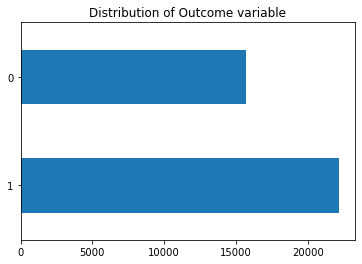

In [90]:
ks['outcome'].value_counts().plot(kind='barh',title="Distribution of Outcome variable")

### Preping the categorical variables

For the categorical variables -- `category`, `currency`, and `country` -- we'll need to convert them into integers so our model can use the data. For this we'll use scikit-learn's `LabelEncoder`. This assigns an integer to each value of the categorical feature.

In [91]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['category', 'currency', 'country']
encoder = LabelEncoder()

# Apply the label encoder to each column
encoded = ks[cat_features].apply(encoder.fit_transform)

In [92]:

data = ks[['goal', 'deadline_hr', 'deadline_dy', 'deadline_mo', 'deadline_yr', 'outcome','created_at_yr','created_at_mo','created_at_dy','created_at_hr']].join(encoded)
data.head()

,goal,deadline_hr,deadline_dy,deadline_mo,deadline_yr,outcome,created_at_yr,created_at_mo,created_at_dy,created_at_hr,category,currency,country
0,75000.0,7,13,2,2019,0,2018,8,24,16,110,13,21
1,6000.0,21,5,2,2017,0,2016,12,9,9,140,13,21
2,1200.0,15,22,11,2016,0,2016,11,11,1,92,13,21
3,10000.0,21,16,5,2018,0,2018,2,3,22,140,13,21
4,20000.0,20,21,5,2019,0,2019,4,15,4,114,13,21


### Create training, validation, and test splits

We need to create data sets for training, validation, and testing. We'll use a fairly simple approach and split the data using slices. We'll use 10% of the data as a validation set, 10% for testing, and the other 80% for training.

In [93]:
data.head()
data.describe()

,goal,deadline_hr,deadline_dy,deadline_mo,deadline_yr,outcome,created_at_yr,created_at_mo,created_at_dy,created_at_hr,category,currency,country
count,3.789400e+04,37894.000000,37894.00000,37894.00000,37894.000000,37894.000000,37894.000000,37894.000000,37894.000000,37894.000000,37894.000000,37894.000000,37894.000000
mean,5.413509e+04,12.482557,12.58690,6.70428,2016.424025,0.586056,2016.228849,6.368159,12.539848,12.475141,71.137726,10.301631,18.234602
std,1.178545e+06,6.896014,6.81531,3.36039,2.314485,0.492545,2.320956,3.355111,6.847447,6.958431,41.674368,4.283468,5.919980
min,1.000000e+00,1.000000,1.00000,1.00000,2009.000000,0.000000,2009.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.500000e+03,7.000000,7.00000,4.00000,2015.000000,0.000000,2015.000000,3.000000,7.000000,6.000000,35.000000,5.000000,20.000000
50%,5.000000e+03,12.000000,12.00000,7.00000,2016.000000,1.000000,2016.000000,6.000000,13.000000,12.000000,69.000000,13.000000,21.000000
75%,1.500000e+04,18.000000,18.00000,10.00000,2019.000000,1.000000,2018.000000,9.000000,18.000000,19.000000,107.000000,13.000000,21.000000
max,1.000000e+08,24.000000,24.00000,12.00000,2020.000000,1.000000,2020.000000,12.000000,24.000000,24.000000,145.000000,13.000000,21.000000


In [120]:
from sklearn.model_selection import train_test_split
X= data.loc[:, data.columns != 'outcome']
Y= data['outcome']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

## Models

 

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,log_loss, roc_curve, roc_auc_score,accuracy_score,f1_score
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [122]:
models=[]

##### 1) Random Forest


In [123]:
Y_train.head()

9684     1
2682     0
11561    1
6369     1
26516    1
Name: outcome, dtype: int32

In [124]:
from sklearn.ensemble import RandomForestClassifier
classifier_1 = RandomForestClassifier(max_depth=2, random_state=0)
models.append({"model":classifier_1,"type":"Random Forest"})

##### 2) KNN Classifer


In [125]:
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors=3)
models.append({"model":classifier_2,"type":"KNN"})


##### 3) Naive Bayes Classfier

In [126]:
from sklearn.naive_bayes import GaussianNB
classifier_3 = GaussianNB()
models.append({"model":classifier_3,"type":"Naive Bayes"})


##### 4) LinearDiscriminantAnalysis

In [127]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier_4 = LinearDiscriminantAnalysis()
models.append({"model":classifier_4,"type":"LDA"})

##### 5) LightGBM

In [128]:
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
dtrain = lgb.Dataset(X_train, label=Y_train)
dtest = lgb.Dataset(X_test, label=Y_test)

param = {'num_leaves': 64, 'objective': 'binary'}
param['metric'] = 'auc'
num_round = 1000
Lgb = LGBMClassifier(n_estimators=90, silent=False, random_state =94, max_depth=5,num_leaves=31,objective='binary',metrics ='auc')
fit_model = Lgb.fit(X_train, Y_train,eval_metric='auc')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 14921, number of negative: 10467
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 25388, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.587719 -> initscore=0.354542
[LightGBM] [Info] Start training from score 0.354542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

## Metrics 

In [129]:
# Accuracy using K-Fold Cross Validation 
folds=5
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for row in models:
  # print(row['model'])
  model=row['model']
 

  # f1_scores = sum(cross_val_score(model, X_train, Y_train, cv=folds,scoring='f1_weighted'))

  model_obj = model.fit(X_train, Y_train)
  yproba = model_obj.predict_proba(X_test)[::,1]
  y_pred = model_obj.predict(X_test)

  accuracy =  accuracy_score(Y_test, y_pred)
  f1 =  f1_score(Y_test, y_pred, average='weighted')

  ll = log_loss(Y_test, yproba)
  fpr, tpr, _ = roc_curve(Y_test,  yproba)
  auc = roc_auc_score(Y_test, yproba)
  tn, fp, fn, tp = confusion_matrix(Y_test,y_pred).ravel()
  result_table = result_table.append({'classifiers':model.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc,
                                        'f1':f1,
                                        'accuracy':accuracy,
                                        'TN':tn,
                                        'FP':fp,
                                        'FN':fn,
                                        'TP':tp,
                                        'log_loss':ll
                                      }, ignore_index=True)


In [130]:
ypred_bst = fit_model.predict(X_test)
ypred_prob = fit_model.predict_proba(X_test)[::,1]
accuracy =  accuracy_score(Y_test, ypred_bst)


f1 =  f1_score(Y_test, ypred_bst, average='weighted')

ll = log_loss(Y_test, yproba)
fpr, tpr, _ = roc_curve(Y_test,  yproba)
ypred_bst = fit_model.predict(X_test)
score = roc_auc_score(Y_test, ypred_bst)
# tn, fp, fn, tp = confusion_matrix(Y_test,ypred_bst).ravel()

result_table = result_table.append({'classifiers':fit_model.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':score,
                                        'f1':f1,
                                        'accuracy':accuracy,
                                        'TN':tn,
                                        'FP':fp,
                                        'FN':fn,
                                        'TP':tp,
                                        'log_loss':ll
                                      }, ignore_index=True)

In [131]:
result_table.set_index('classifiers', inplace=True)
result_table

,fpr,tpr,auc,FN,FP,TN,TP,accuracy,f1,log_loss
classifiers,,,,,,,,,,
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0003832151753209427, 0.00038...","[0.0, 0.00013723068478111705, 0.00027446136956...",0.710954,366.0,4253.0,966.0,6921.0,0.630657,0.559966,0.638337
KNeighborsClassifier,"[0.0, 0.16669860126461009, 0.49817972791722553...","[0.0, 0.3156305749965692, 0.6946617263620145, ...",0.629757,2225.0,2600.0,2619.0,5062.0,0.614185,0.611836,4.251701
GaussianNB,"[0.0, 0.0, 0.00019160758766047136, 0.000191607...","[0.0, 0.00013723068478111705, 0.00013723068478...",0.548607,12.0,5176.0,43.0,7275.0,0.585159,0.436332,0.815381
LinearDiscriminantAnalysis,"[0.0, 0.0, 0.00019160758766047136, 0.000191607...","[0.0, 0.00013723068478111705, 0.00013723068478...",0.571253,503.0,4854.0,365.0,6784.0,0.571646,0.467792,0.672547
LGBMClassifier,"[0.0, 0.0, 0.00019160758766047136, 0.000191607...","[0.0, 0.00013723068478111705, 0.00013723068478...",0.757324,503.0,4854.0,365.0,6784.0,0.768111,0.766961,0.672547


In [132]:
for i in result_table.index:
    print(i)
#result_table.loc[GaussianNB]['auc']
result_table.drop(['GaussianNB'])
for i in result_table.index:
    print(i)

RandomForestClassifier
KNeighborsClassifier
GaussianNB
LinearDiscriminantAnalysis
LGBMClassifier
RandomForestClassifier
KNeighborsClassifier
GaussianNB
LinearDiscriminantAnalysis
LGBMClassifier


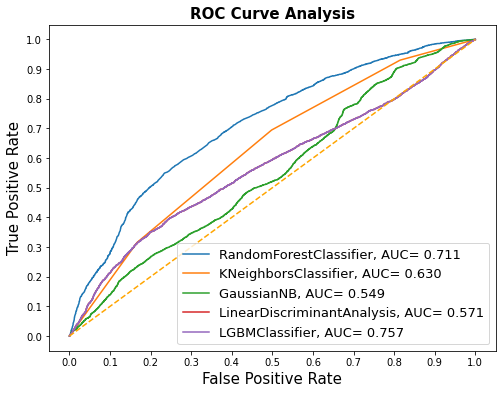

In [133]:
fig = plt.figure(figsize=(8,6))
#result_table.drop(['GaussianNB'], inplace = True)

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC= {:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

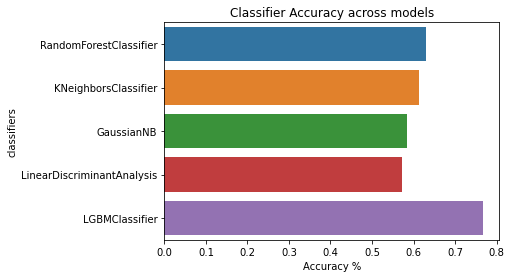

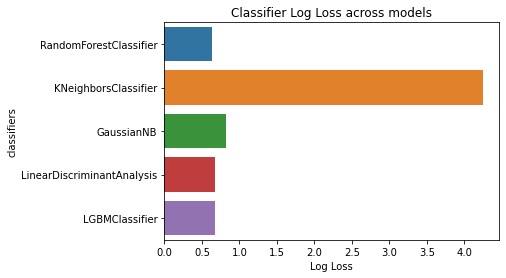

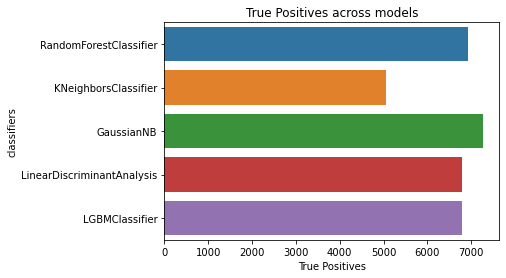

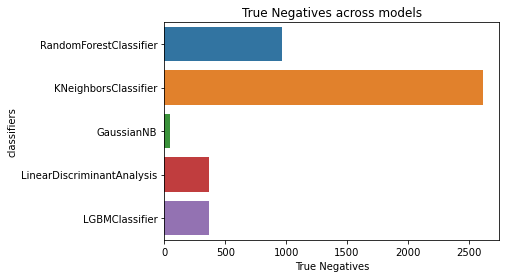

In [134]:
import seaborn as sns
sns.set_color_codes("muted")
sns.barplot(x='accuracy', y=result_table.index, data=result_table)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy across models')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='log_loss', y=result_table.index, data=result_table)

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss across models')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='TP', y=result_table.index, data=result_table)

plt.xlabel('True Positives')
plt.title('True Positives across models')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='TN', y=result_table.index, data=result_table)

plt.xlabel('True Negatives')
plt.title('True Negatives across models')
plt.show()

###  Selection of Models , Along with Value Propisition :

##### We have two different questions we want to answer : 
- For Business Owners : Will my project work ? ( Predicting if the project would be Unsuccessful ) 
- For Investors : Is this project a sound investment ? ( Predicting if the the project will be successful ) 

In [135]:
input_data = pd.read_csv('project_2.csv')
input_data=input_data.tail(20)
input_data

,ID,name,category,main_category,currency,deadline_yr,deadline_mo,deadline_dy,deadline_hr,deadline_mi,...,created_at_hr,created_at_mi,created_at_sc,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
38957,1062408373,The revolution in eyeglasses for daily use: 2-...,Accessories,Fashion,EUR,2018,7,6,16,50,...,10,34,53,16279.0,successful,191,Spain,18975.626280,13769.038641,12687.239979
38958,1186272557,We are creating the first ever voiceless opera...,Classical Music,Music,CAD,2014,1,3,18,30,...,1,30,29,5278.0,successful,77,Canada,5044.890744,6878.490194,6516.190028
38959,1647243928,SΞCRΞTS ΛRΞ ΞVΞRYWHΞRΞ.,Puzzles,Games,USD,2019,9,6,20,7,...,4,44,59,1025.0,successful,16,the United States,1025.000000,1025.000000,1000.000000
38960,1866082699,15 classic kid's songs recorded with AMAZING L...,Kids,Music,USD,2012,11,10,12,14,...,20,60,20,10205.0,successful,116,the United States,10205.000000,10205.000000,9500.000000
38961,1625728773,Get FREE ENERGY to charge your phone using you...,Wearables,Technology,USD,2015,2,9,5,53,...,1,33,31,3152.0,canceled,66,the United States,3152.000000,3152.000000,8000.000000
38962,2025622905,A documentary that explores the effect of Dona...,Documentary,Film & Video,USD,2017,6,3,19,10,...,18,38,25,2222.0,successful,53,the United States,2222.000000,2222.000000,2000.000000
38963,1338551515,The funds from this Kickstarter project will b...,Web,Journalism,USD,2015,6,5,20,4,...,3,19,11,0.0,failed,0,the United States,0.000000,0.000000,10000.000000
38964,1685061546,A young writer at the end of her rope struggle...,Drama,Film & Video,USD,2018,9,23,17,9,...,7,51,10,8402.0,successful,46,the United States,8402.000000,8402.000000,7500.000000
38965,524190551,A documentary about food education in Japan; a...,Documentary,Film & Video,USD,2018,2,13,17,52,...,20,10,56,12929.0,successful,161,the United States,12929.000000,12929.000000,12000.000000
38966,1487098573,The early-music ensemble Postscript records it...,Classical Music,Music,EUR,2019,7,18,6,15,...,24,26,39,4566.5,successful,59,the Netherlands,5166.653267,3862.418758,3264.849755


## For Business Owners - 

The users that are actually pitching their idea to being crowdsourced. This means the owners are looking for investors to invest in their project. Business Owners can know if their idea will be unsuccessful and probably flex their idea a bit to help gain investors and reach their goal target. 

**Note :** Thus we want to select a model which has the highest True Negatives i.e. *Did the model **correctly** predict the project is **unsuccessful** .*

##### KNeighboursClassifier

In [136]:
test_1=input_data[1:2]
test_1.T

,38958
ID,1186272557
name,We are creating the first ever voiceless opera...
category,Classical Music
main_category,Music
currency,CAD
deadline_yr,2014
deadline_mo,1
deadline_dy,3
deadline_hr,18
deadline_mi,30


In [137]:
data[1:2]

,goal,deadline_hr,deadline_dy,deadline_mo,deadline_yr,outcome,created_at_yr,created_at_mo,created_at_dy,created_at_hr,category,currency,country
1,6000.0,21,5,2,2017,0,2016,12,9,9,140,13,21


#### Result 

In [138]:
#KNN Classifier
test_for_X=data[1:2].loc[:, data.columns != 'outcome']
table_output = pd.DataFrame(columns=['percentage_unsuccessful','percentage_succesful'])
# table_output.append(classifier_2.predict_proba(test_for_X)[0])
temp=classifier_2.predict_proba(test_for_X)[0]
table_output=table_output.append({'percentage_unsuccessful':temp[0]*100,'percentage_succesful':temp[1]*100},ignore_index=True)
table_output

,percentage_unsuccessful,percentage_succesful
0,33.333333,66.666667


#### Now we can say that the project has 33.3% chance of being un-successful , which can give the business owners some confidence on how their project might perform. 


## For Investors - 

The users look into different projects to invest in. Thus users would like to know if a particular project they are interested in is worth investing for. The probability of being succcessful will help investors know the risk they want to take while making an investment. 

**Note :** Thus we want to select a model which has the highest True Positives and high accuracy i.e. *Did the model **correctly** predict the project is **successful** .*

##### LGBMClassifier

In [70]:
test_1=input_data[3:4]
test_1.T

,38960
ID,1866082699
name,15 classic kid's songs recorded with AMAZING L...
category,Kids
main_category,Music
currency,USD
deadline_yr,2012
deadline_mo,11
deadline_dy,10
deadline_hr,12
deadline_mi,14


In [139]:
#LGBMClassifier
test_for_X=data[6:7].loc[:, data.columns != 'outcome']
table_output = pd.DataFrame(columns=['percentage_unsuccessful','percentage_succesful'])
# table_output.append(classifier_2.predict_proba(test_for_X)[0])
temp=fit_model.predict_proba(test_for_X)[0]
table_output=table_output.append({'percentage_unsuccessful':temp[0]*100,'percentage_succesful':temp[1]*100},ignore_index=True)
table_output

,percentage_unsuccessful,percentage_succesful
0,25.940237,74.059763


#### Now we can say that the project has 74% chance of being successful , which can give the investors enough confidence on putting their money in the business so that they can expect some return

## Conclusion :
The project aimed to use Kickstarter campaign data to predict if a project will be successful or not. 

The use-case were broadly categorized into two :
- For Business Owners : The one pitching the idea of being crowd-sourced
- For Investors : The users that are investing in the project to get some return . 

#### For Business Owners / Entrepreneur :
The owners want to see if the business will reach their goal or not. Thus they want to focus on answering the question : " What are the chances the project will fail ?". We used KNNClassifer to find an answer to this solution because KNN gave us the highest True Negatives

#### For Investors  :
The investors want to see if the project will be succesful or not . They want an answer to the question : " What are the chances that we can find a return on the investment?" . We used LGBMClassifier as it has the highest TPR and Accuracy which are both important. 